<a href="https://colab.research.google.com/github/venkatbabukr/AllProjects/blob/main/Scaler/Modules/Numpy_Buzz_Terms%2C_Nuances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Overview](#scrollTo=Pw6zveU_iFmc)

>[Creation, Initialization, Casting etc...](#scrollTo=54I4UUoEZtcJ)

>[NP Array structure](#scrollTo=ApMqsNJJzWnn)

>[Indexing & Slicing](#scrollTo=4iLJ7zL5gs4b)

>>[Types:](#scrollTo=4iLJ7zL5gs4b)

>>[Other concepts](#scrollTo=4iLJ7zL5gs4b)

>[Adding new axis/dimensions](#scrollTo=F4IGBNLM5paQ)

>[Flatten, Reshape](#scrollTo=Wh8-CYaAcg2l)

>[Sorting](#scrollTo=udq7IN3dgEi2)

>[Splitting & Stacking](#scrollTo=Nyag45r7ArDr)

>>[Splitting](#scrollTo=Nyag45r7ArDr)

>>[Stacking](#scrollTo=Nyag45r7ArDr)

>[Shallow and Deep Copies](#scrollTo=xxsRg-BSpkAw)

>>[NumPy operations resulting in shallow copies](#scrollTo=xxsRg-BSpkAw)

>>[NumPy operations that perform deep copies](#scrollTo=xxsRg-BSpkAw)

>>[References:](#scrollTo=xxsRg-BSpkAw)

>[Aggregation](#scrollTo=o8oysTU7gJL-)

>[Vectorization, Broadcasting](#scrollTo=S2lygVysZooY)

>[Matrix operations](#scrollTo=ptc-hTmE3gfL)

>[Practical applications](#scrollTo=tdcez_WQ6aZr)

>>[AirBNB NPS calculation](#scrollTo=vaD6QGFF6jOv)

>>[Image manipulations](#scrollTo=g7EGY5rKvFrx)



# Overview
NumPy = **Numerical Python**

Higly optimized for all numerical calculations, vectorization, matrix operations, transformations etc...

In [1]:
# Setup cell.
# Contains global imports, global variables initialization etc...
#
# For now, always execute this manually when opening a new session...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define any global variables or configurations here
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Setup cell executed: Common libraries imported and random seed set.")

Setup cell executed: Common libraries imported and random seed set.


# Creation, Initialization, Casting etc...

1. [np.zeros etc...](#scrollTo=0-fxP5T8ekAm&line=1&uniqifier=1)
2. [np.arange](#scrollTo=fyKD6R_Lcy0V&line=5&uniqifier=1)
3. [np.array]()

In [2]:
import math

arr_allzeros = np.zeros((3, 4))
arr_allones = np.ones((3, 4), dtype='int')
arr_randint = np.random.randint(1,5, size = (3, 4))
arr_allpi = np.full((3, 4), math.pi)

print(f"arr_allzeros:\n{arr_allzeros}")
print(f"\narr_allones:\n{arr_allones}")
print(f"\narr_randint:\n{arr_randint}")
print(f"\narr_allpi:\n{arr_allpi}")

arr_allzeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

arr_allones:
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

arr_randint:
[[3 4 1 3]
 [3 4 1 1]
 [3 2 3 3]]

arr_allpi:
[[3.14159265 3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265]]


In [3]:
arr1 = np.arange(10)
print(f"np.arange(10) = {arr1}")
print(f"np.arange(5, 16) = {np.arange(5, 16)}")
print(f"np.arange(5, 16, 2) = {np.arange(5, 16, 2)}")

print(f"""
Important attributes:

type(arr1) = {type(arr1)}
arr1.dtype = {arr1.dtype}
arr1.ndim = {arr1.ndim}
arr1.shape = {arr1.shape}
arr1.size = {arr1.size}
arr1.astype('float64) = {arr1.astype('float64')}
""")

np.arange(10) = [0 1 2 3 4 5 6 7 8 9]
np.arange(5, 16) = [ 5  6  7  8  9 10 11 12 13 14 15]
np.arange(5, 16, 2) = [ 5  7  9 11 13 15]

Important attributes:

type(arr1) = <class 'numpy.ndarray'>
arr1.dtype = int64
arr1.ndim = 1
arr1.shape = (10,)
arr1.size = 10
arr1.astype('float64) = [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]



In [4]:
arr2 = np.array([3, 2, 1, 4, 5])
print(f"np.array([3, 2, 1, 4, 5]) = {arr2}")

list_2 = [0,1,2,3,4.83,5,6,7,8,9,10]

arr_2 = np.array(list_2)

print(f"list_2 = {list_2}")
print(f"arr_2 = {arr_2}")

np.array([3, 2, 1, 4, 5]) = [3 2 1 4 5]
list_2 = [0, 1, 2, 3, 4.83, 5, 6, 7, 8, 9, 10]
arr_2 = [ 0.    1.    2.    3.    4.83  5.    6.    7.    8.    9.   10.  ]


# NP Array structure

1. **ndim**: Number of dimensions of the array.
2. **shape**: The tuple describing array's spread/number of elements in each dimension
3. **Axis**: Each dimension becomes axis
    * **In 2D**: ***axis 0*** is ***rows***, ***axis 1*** is ***columns***
    * **In 3D**: ***axis 0*** is the ***stack***, ***axis 1*** is the ***rows***, ***axis 2*** is the ***columns***
4. **size**: Total size or total number of elements in the array = x*y*z... where x, y, z are count in each dimension

# Indexing & Slicing

Approach
```
arr[row_index, col_index]
arr[row_slice, col_slice]
```

**Very imortant note:** All indexing, slicing etc... create views of the array. They don't create a separate copy! Read [Shallow and Deep Copies](#scrollTo=xxsRg-BSpkAw) to understand more.

## Types:

1. [Basic](#scrollTo=H0wMAshcy_lZ&line=2&uniqifier=1)
2. [Boolean indexing](#scrollTo=IWGFIvTx449H&line=2&uniqifier=1)
3. [Fancy indexing](#scrollTo=o6yxbAN659EA&line=1&uniqifier=1)
4. [Assignment using indexing](#scrollTo=8v3CYg-v9W9t&line=13&uniqifier=1)

## Other concepts

1. Slicing
2. Adding new dimension

In [5]:
# Basic indexing and slicing

arr1 = np.arange(16).reshape(4, 4)
print(f"arr1:\n{arr1}")
print(f"\nFirst row of arr1 = arr1[0,:] = {arr1[0,:]}")
print(f"\nLast row of arr1 = arr1[-1,:] = {arr1[-1,:]}")
print(f"\nFirst 2 rows of arr1 = arr1[:2] =\n{arr1[:2]}")
print(f"\nSecond column of arr1 = arr1[:,1] = {arr1[:,1]}")
print(f"\nLast column of arr1 = arr1[:,-1] = {arr1[:,-1]}")
print(f"\nAlternate rows of arr1 = arr1[::2,:] =\n{arr1[::2,:]}")
print(f"\nAlternate columns of arr1 = arr1[:,::2] =\n{arr1[:,::2]}")
print(f"\nVertical flip of arr1 = arr1[::-1,:] =\n{arr1[::-1,:]}")
print(f"\nHorizontal flip of arr1 = arr1[:,::-1] =\n{arr1[:,::-1]}")

arr1:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

First row of arr1 = arr1[0,:] = [0 1 2 3]

Last row of arr1 = arr1[-1,:] = [12 13 14 15]

First 2 rows of arr1 = arr1[:2] =
[[0 1 2 3]
 [4 5 6 7]]

Second column of arr1 = arr1[:,1] = [ 1  5  9 13]

Last column of arr1 = arr1[:,-1] = [ 3  7 11 15]

Alternate rows of arr1 = arr1[::2,:] =
[[ 0  1  2  3]
 [ 8  9 10 11]]

Alternate columns of arr1 = arr1[:,::2] =
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]

Vertical flip of arr1 = arr1[::-1,:] =
[[12 13 14 15]
 [ 8  9 10 11]
 [ 4  5  6  7]
 [ 0  1  2  3]]

Horizontal flip of arr1 = arr1[:,::-1] =
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]
 [15 14 13 12]]


In [6]:
# Boolean indexing
arr1 = np.arange(6)
print(f"arr1: {arr1}")
print(f"\nOdd numbers boolean array = arr1 % 2 == 1 = {arr1 % 2 == 1}")
print(f"\nOdd numbers = arr1[arr1 % 2 == 1] = {arr1[arr1 % 2 == 1]}")
print(f"\nEven numbers boolean array = arr1 % 2 == 0 = {arr1 % 2 == 0}")
print(f"\nEven numbers = arr1[arr1 % 2 == 0] = {arr1[arr1 % 2 == 0]}")

names = np.array(['Virat', 'Rohit', 'Rahul', 'Dhoni', 'Rishab'])
scores = np.array([34, 73, 41, 99, 97])

#Print all those names who scored 50 or more
students_with_50_or_more_score = list(zip(names[scores >= 50].tolist(), scores[scores >= 50].tolist()))
print(f"\nStudents who scored 50 or more = {students_with_50_or_more_score}")

arr1: [0 1 2 3 4 5]

Odd numbers boolean array = arr1 % 2 == 1 = [False  True False  True False  True]

Odd numbers = arr1[arr1 % 2 == 1] = [1 3 5]

Even numbers boolean array = arr1 % 2 == 0 = [ True False  True False  True False]

Even numbers = arr1[arr1 % 2 == 0] = [0 2 4]

Students who scored 50 or more = [('Rohit', 73), ('Dhoni', 99), ('Rishab', 97)]


In [7]:
# Fancy indexing
arr1 = np.arange(1, 11)
print(f"arr1: {arr1}")
print(f"\nFancy indexing using lists = arr1[[0, 3, 8]] = {arr1[[0, 3, 8]]}")
print(f"\nFancy indexing using range arr1[range(0, 10, 2)] = {arr1[range(0, 10, 2)]}")

arr1: [ 1  2  3  4  5  6  7  8  9 10]

Fancy indexing using lists = arr1[[0, 3, 8]] = [1 4 9]

Fancy indexing using range arr1[range(0, 10, 2)] = [1 3 5 7 9]


In [8]:
# Assignemnt using fancy indexing...

arr1 = np.arange(10)
print(f"arr1: {arr1}")

# Negate all even numbers!
arr1[arr1 % 2 == 0] = -arr1[arr1 % 2 == 0]
print(f"\narr1 after negating even numbers: {arr1}")

arr1 = abs(arr1)
# Negate the whole array!
arr1 = -arr1
print(f"\narr1 after negating the whole array: {arr1}")

arr1: [0 1 2 3 4 5 6 7 8 9]

arr1 after negating even numbers: [ 0  1 -2  3 -4  5 -6  7 -8  9]

arr1 after negating the whole array: [ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]


# Adding new axis/dimensions

Approaches:
1. Use np.newaxis when indexing/slicing. This is possible when we explicitly know the shape of array

2. Use np.expand_dims. This is helpful when we don't know the shape of array!

In [9]:
# Adding new axis during Indexing/slicing
arr1 = np.arange(10)
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
""")

arr1_2d_row = arr1[np.newaxis, :] # Can also use arr1_2d = arr1[:, None]
print(f"""
arr1_2d_row = arr1[np.newaxis, :] =
Metadata: {{'shape': {arr1_2d_row.shape}, 'shares_memory': {np.shares_memory(arr1, arr1_2d_row)}}}
Data:
{arr1_2d_row}
""")

arr1_2d_column = arr1[:, np.newaxis] # Can also use arr1_2d = arr1[:, None]
print(f"""
arr1_arr1_2d_column2d = arr1[:, np.newaxis] =
Metadata: {{'shape': {arr1_2d_column.shape}, 'shares_memory': {np.shares_memory(arr1, arr1_2d_column)}}}
Data:
{arr1_2d_column}
""")


arr1 =
Metadata: {'shape': (10,)}
Data:
[0 1 2 3 4 5 6 7 8 9]


arr1_2d_row = arr1[np.newaxis, :] =
Metadata: {'shape': (1, 10), 'shares_memory': True}
Data:
[[0 1 2 3 4 5 6 7 8 9]]


arr1_arr1_2d_column2d = arr1[:, np.newaxis] =
Metadata: {'shape': (10, 1), 'shares_memory': True}
Data:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]



In [10]:
# Expanding dims using np.expand_dims

arr = np.array([1, 2, 3, 4]) # Shape: (4,)
print(f"""
arr =
Metadata: {{'shape': {arr.shape}}}
Data:
{arr}
""")

# Add a new axis at the beginning (axis 0) to get shape (1, 4)
row_vec = np.expand_dims(arr, axis=0)
print(f"""
row_vec = np.expand_dims(arr, axis=0) =
Metadata: {{'shape': {row_vec.shape}, 'shares_memory': {np.shares_memory(arr, row_vec)}}}
Data:
{row_vec}
""")

# Add a new axis at the end (axis 1) to get shape (4, 1)
col_vec = np.expand_dims(arr, axis=1)
print(f"""
col_vec = np.expand_dims(arr, axis=1) =
Metadata: {{'shape': {col_vec.shape}, 'shares_memory': {np.shares_memory(arr, col_vec)}}}
Data:
{col_vec}
""")


arr =
Metadata: {'shape': (4,)}
Data:
[1 2 3 4]


row_vec = np.expand_dims(arr, axis=0) =
Metadata: {'shape': (1, 4), 'shares_memory': True}
Data:
[[1 2 3 4]]


col_vec = np.expand_dims(arr, axis=1) =
Metadata: {'shape': (4, 1), 'shares_memory': True}
Data:
[[1]
 [2]
 [3]
 [4]]



# Flatten, Reshape

In [11]:
# Flatten 2-D, 3-D arrays
arr_2d = np.arange(16).reshape(4, 4)
arr_3d = np.arange(24).reshape(2, 3, 4)
print(f"arr_2d:\n{arr_2d}")
print(f"\narr_3d:\n{arr_3d}")

arr_2d_flat = arr_2d.flatten()
arr_3d_flat = arr_3d.flatten()
print(f"\narr_2d_flat:\n{arr_2d_flat}")
print(f"\narr_3d_flat:\n{arr_3d_flat}")

arr_2d:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

arr_3d:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

arr_2d_flat:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

arr_3d_flat:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [12]:
# Reshaping
arr = np.ones((3, 4)).astype('int')
print(f"""
arr =
Metadata: {{'shape': {arr.shape}}}
Data:
{arr}
""")

arr_reshaped = arr.reshape(2, 6)
print(f"""
arr_reshaped = arr.reshape(2, 6) =
Metadata: {{'shape': {arr_reshaped.shape}}}
Data:
{arr_reshaped}
""")

## Flattening using reshape.
## Important: Use this only when you don't want to create deep copy
print(f"""
Flattening using reshape.
Important: Use this only when you don't want to create deep copy
""")

arr_flattened1 = arr.reshape(-1)
print(f"""
arr_flattened1 = arr.reshape(-1) =
Metadata: {{'shape': {arr_flattened1.shape}}}
Data:
{arr_flattened1}
""")

arr_flattened2 = arr.reshape(1, arr.size)[0]
print(f"""
arr_flattened2 = arr.reshape(1, arr.size)[0] =
Metadata: {{'shape': {arr_flattened2.shape}}}
Data:
{arr_flattened2}
""")


arr =
Metadata: {'shape': (3, 4)}
Data:
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


arr_reshaped = arr.reshape(2, 6) =
Metadata: {'shape': (2, 6)}
Data:
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]]


Flattening using reshape.
Important: Use this only when you don't want to create deep copy


arr_flattened1 = arr.reshape(-1) =
Metadata: {'shape': (12,)}
Data:
[1 1 1 1 1 1 1 1 1 1 1 1]


arr_flattened2 = arr.reshape(1, arr.size)[0] =
Metadata: {'shape': (12,)}
Data:
[1 1 1 1 1 1 1 1 1 1 1 1]



# Sorting

1. [Inplace v/s deep copy](#scrollTo=Cm-G2tL60HXy&line=2&uniqifier=1)
2. [Sorting in higher dimensions](#scrollTo=NDO6mQiH1s2U&line=1&uniqifier=1)
3. [Arg sorting](#scrollTo=WWxHqOWgB_7z&line=1&uniqifier=1)

In [13]:
arr1 = np.random.randint(1, 100, size=10)
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
""")

# Sort with deep copy
arr2 = np.sort(arr1)
print(f"""
After np.sort():
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
arr2 = np.sort(arr1) =
Metadata: {{'shape': {arr2.shape}, 'shares_memory': {np.shares_memory(arr1, arr2)}}}
Data:
{arr2}
""")

# In-place sorting
arr1.sort()
print(f"""
After inplace arr1.sort():
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
""")


arr1 =
Metadata: {'shape': (10,)}
Data:
[75 75 88 24  3 22 53  2 88 30]


After np.sort():
arr1 =
Metadata: {'shape': (10,)}
Data:
[75 75 88 24  3 22 53  2 88 30]
arr2 = np.sort(arr1) =
Metadata: {'shape': (10,), 'shares_memory': False}
Data:
[ 2  3 22 24 30 53 75 75 88 88]


After inplace arr1.sort():
Metadata: {'shape': (10,)}
Data:
[ 2  3 22 24 30 53 75 75 88 88]



In [14]:
# 2D sorting
arr1 = np.random.randint(1, 100, size=(3, 4))
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}""")

arr1.sort()
print(f"""
After default inplace arr1.sort() on the lowest dimension/last axis (axis=1 here):
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}""")

arr1.sort(axis=0)
print(f"""
After arr1.sort(axis=0):
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}""")


arr1 =
Metadata: {'shape': (3, 4)}
Data:
[[38  2 64 60]
 [21 33 76 58]
 [22 89 49 91]]

After default inplace arr1.sort() on the lowest dimension/last axis (axis=1 here):
arr1 =
Metadata: {'shape': (3, 4)}
Data:
[[ 2 38 60 64]
 [21 33 58 76]
 [22 49 89 91]]

After arr1.sort(axis=0):
arr1 =
Metadata: {'shape': (3, 4)}
Data:
[[ 2 33 58 64]
 [21 38 60 76]
 [22 49 89 91]]


In [15]:
# Argsorting
arr1 = np.random.randint(1, 100, size=15)
print(f"arr1 = {arr1}")
print(f"arr1.argsort() = {arr1.argsort()}")
print(f"arr1[arr1.argsort()] = {arr1[arr1.argsort()]}")

# Argsorting in higher dimension
arr1 = np.random.randint(1, 100, size=16).reshape(4,4)
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
""")
arr1_default_axis_argsort = arr1.argsort()
print(f"""arr1.argsort() =
{arr1_default_axis_argsort}
""")
arr1_axis0_argsort = arr1.argsort(axis = 0)
print(f"""arr1.argsort(axis = 0) =
{arr1_axis0_argsort}
""")

arr1 = [59 42 92 60 80 15 62 62 47 62 51 55 64  3 51]
arr1.argsort() = [13  5  1  8 10 14 11  0  3  9  6  7 12  4  2]
arr1[arr1.argsort()] = [ 3 15 42 47 51 51 55 59 60 62 62 62 64 80 92]

arr1 =
Metadata: {'shape': (4, 4)}
Data:
[[ 7 21 73 39]
 [18  4 89 60]
 [14  9 90 53]
 [ 2 84 92 60]]

arr1.argsort() =
[[0 1 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [0 3 1 2]]

arr1.argsort(axis = 0) =
[[3 1 0 0]
 [0 2 1 2]
 [2 0 2 1]
 [1 3 3 3]]



# Splitting & Stacking

## Splitting
1. Basic idea of splitting is to partition the array.

2. Splitting **performs shallow copy**

3. Split sizes
    * Equal sizes: Pass the size of each split. Let python decide the indices where to split
    * Unequal sizes: Give the indices list where split has to be done!

4. Higher dimension splits:
    * Easiest way to understand and remember `hsplit` and `vsplit` is to remember `hsplit` or `vsplit` i.e. tear the image/photo accordingly!

## Stacking
1. Only stacking arrays of same size, same data type possible.

2. Stacking **performs deep copy**

In [16]:
arr1 = np.arange(16)
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
""")

# Split into equal pieces
print("Split into equal pieces")
splits = np.split(arr1, 4)
for _, s_arr in enumerate(splits):
  print(f"""
  Split {_+1}:
  Metadata: {{'shape': {s_arr.shape}, 'shares_memory': {np.shares_memory(s_arr, arr1)}}}
  Data:
  {s_arr}
  """)

# Split into unequal pieces - Pass the list of indeces where split has to be done!
print("\nSplit into unequal pieces")
splits = np.array_split(arr1, [2, 5, 9])
for _, s_arr in enumerate(splits):
  print(f"""
  Split {_+1}:
  Metadata: {{'shape': {s_arr.shape}, 'shares_memory': {np.shares_memory(s_arr, arr1)}}}
  Data:
  {s_arr}
  """)



arr1 =
Metadata: {'shape': (16,)}
Data:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Split into equal pieces

  Split 1:
  Metadata: {'shape': (4,), 'shares_memory': True}
  Data:
  [0 1 2 3]
  

  Split 2:
  Metadata: {'shape': (4,), 'shares_memory': True}
  Data:
  [4 5 6 7]
  

  Split 3:
  Metadata: {'shape': (4,), 'shares_memory': True}
  Data:
  [ 8  9 10 11]
  

  Split 4:
  Metadata: {'shape': (4,), 'shares_memory': True}
  Data:
  [12 13 14 15]
  

Split into unequal pieces

  Split 1:
  Metadata: {'shape': (2,), 'shares_memory': True}
  Data:
  [0 1]
  

  Split 2:
  Metadata: {'shape': (3,), 'shares_memory': True}
  Data:
  [2 3 4]
  

  Split 3:
  Metadata: {'shape': (4,), 'shares_memory': True}
  Data:
  [5 6 7 8]
  

  Split 4:
  Metadata: {'shape': (7,), 'shares_memory': True}
  Data:
  [ 9 10 11 12 13 14 15]
  


In [17]:
# Higher dimension splits - vsplit, hsplit and split...

arr1 = np.arange(16).reshape(4, 4)
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
""")

print("\nnp.vsplit(arr1, 2)")
vsplits = np.vsplit(arr1, 2)
for _, s_arr in enumerate(vsplits):
  print(f"""
  V Split {_+1}:
  Metadata: {{'shape': {s_arr.shape}, 'shares_memory': {np.shares_memory(s_arr, arr1)}}}
  Data:
  {s_arr}
  """)

print("\nnp.hsplit(arr1, 2)")
hsplits = np.hsplit(arr1, 2)
for _, s_arr in enumerate(hsplits):
  print(f"""
  H Split {_+1}:
  Metadata: {{'shape': {s_arr.shape}, 'shares_memory': {np.shares_memory(s_arr, arr1)}}}
  Data:
  {s_arr}
  """)

print("\nnp.split(arr1, 2, axis=1)")
splits = np.split(arr1, 2, axis=1)
for _, s_arr in enumerate(splits):
  print(f"""
  H Split {_+1}:
  Metadata: {{'shape': {s_arr.shape}, 'shares_memory': {np.shares_memory(s_arr, arr1)}}}
  Data:
  {s_arr}
  """)


arr1 =
Metadata: {'shape': (4, 4)}
Data:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


np.vsplit(arr1, 2)

  V Split 1:
  Metadata: {'shape': (2, 4), 'shares_memory': True}
  Data:
  [[0 1 2 3]
 [4 5 6 7]]
  

  V Split 2:
  Metadata: {'shape': (2, 4), 'shares_memory': True}
  Data:
  [[ 8  9 10 11]
 [12 13 14 15]]
  

np.hsplit(arr1, 2)

  H Split 1:
  Metadata: {'shape': (4, 2), 'shares_memory': True}
  Data:
  [[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
  

  H Split 2:
  Metadata: {'shape': (4, 2), 'shares_memory': True}
  Data:
  [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]
  

np.split(arr1, 2, axis=1)

  H Split 1:
  Metadata: {'shape': (4, 2), 'shares_memory': True}
  Data:
  [[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
  

  H Split 2:
  Metadata: {'shape': (4, 2), 'shares_memory': True}
  Data:
  [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]
  


# Shallow and Deep Copies

One of the significant contributing factors for high efficiency of numpy operations is the concept of shared memory... Most of the operations like indexing, sizing, reshaping etc... don't create copies of numpy arrays, instead they create different representations of the same underlying shared array. This way those operations are all very fast and efficient during execution! These different representations of same underlying data array are called **shallow copies**. Whereas in few operations, the underlying data array gets cloned or copied over. Such operations create **deep copies** of the data.

So, it is important to understand where all **shallow copies** happen and the underlying array gets shared!

**numpy.shares_memory**: This function can be used to programatically verify whether two references/two numpy representations point to same underlying data array or point to different data arrays.

## NumPy operations resulting in shallow copies
1. Indexing
2. Slicing
3. Reshape
4. Adding new axis/increasing dimension
5. Inplace sorting
6. Splitting

## NumPy operations that perform deep copies
1. Flatten: This is by design choice. Google for more understanding and details!
2. np.sort - Sorting with deep copy
3. Stacking

## References:
 [Documentation of np.shares_memory()](https://numpy.org/doc/2.2/reference/generated/numpy.shares_memory.html)

In [18]:
# Shallow and deep copies
arr1 = np.ones((4, 4))
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}""")

arr2 = arr1[1]
print(f"""
Indexing ex:
arr2 = arr1[1] =
Metadata: {{'shape': {arr2.shape}, 'shares_memory': {np.shares_memory(arr1, arr2)}}}
Data:
{arr2}
""")

arr3 = arr1[:,:arr1.shape[1]//2]
print(f"""
Slicing ex:
arr3 = arr1[:,:arr1.shape[1]//2]
Metadata: {{'shape': {arr3.shape}, 'shares_memory': {np.shares_memory(arr1, arr3)}}}
Data:
{arr3}
""")

arr4 = arr1.reshape(8, 2)
print(f"""
Reshaping ex:
arr4 = arr1.reshape(8, 2)
Metadata: {{'shape': {arr4.shape}, 'shares_memory': {np.shares_memory(arr1, arr4)}}}
Data:
{arr4}
""")

arr5 = arr1.flatten()
print(f"""
Flatten ex:
arr5 = arr1.flatten()
Metadata: {{'shape': {arr5.shape}, 'shares_memory': {np.shares_memory(arr1, arr5)}}}
Data:
{arr5}
""")



arr1 =
Metadata: {'shape': (4, 4)}
Data:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Indexing ex:
arr2 = arr1[1] =
Metadata: {'shape': (4,), 'shares_memory': True}
Data:
[1. 1. 1. 1.]


Slicing ex:
arr3 = arr1[:,:arr1.shape[1]//2]
Metadata: {'shape': (4, 2), 'shares_memory': True}
Data:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Reshaping ex:
arr4 = arr1.reshape(8, 2)
Metadata: {'shape': (8, 2), 'shares_memory': True}
Data:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Flatten ex:
arr5 = arr1.flatten()
Metadata: {'shape': (16,), 'shares_memory': False}
Data:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



# Aggregation

1. Mathematical aggregation
2. Logical aggregations
3. Higher dimension aggregations

In [19]:
arr1 = np.arange(15)
print(f"arr1 = {arr1}")

print(f"arr1.sum() = {arr1.sum()}")
print(f"arr1.mean() = {arr1.mean()}")
print(f"arr1.std() = {arr1.std()}")
print(f"arr1.var() = {arr1.var()}")
print(f"arr1.min() = {arr1.min()}")
print(f"arr1.max() = {arr1.max()}")
print(f"arr1.argmin() = {arr1.argmin()}")
print(f"arr1.argmax() = {arr1.argmax()}")

arr1 = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
arr1.sum() = 105
arr1.mean() = 7.0
arr1.std() = 4.320493798938574
arr1.var() = 18.666666666666668
arr1.min() = 0
arr1.max() = 14
arr1.argmin() = 0
arr1.argmax() = 14


In [20]:
# Logical aggregations - any, all

arr1 = np.random.randint(0, 25, size=10)
print(f"arr1 = {arr1}")
print(f"np.any(arr1 > 5) = {np.any(arr1 > 5)}")
print(f"np.all(arr1 > 5) = {np.all(arr1 > 5)}")

arr1 = [ 6 11  7 14  2 13 16  3 17  7]
np.any(arr1 > 5) = True
np.all(arr1 > 5) = False


In [21]:
# 2D array
arr1 = np.arange(16).reshape(4, 4)
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
""")

print(f"arr1.sum(axis=0) = {arr1.sum(axis=0)}")
print(f"arr1.mean(axis=0) = {arr1.mean(axis=0)}")
print(f"arr1.std(axis=0) = {arr1.std(axis=0)}")
print(f"arr1.var(axis=0) = {arr1.var(axis=0)}")
print(f"arr1.min(axis=0) = {arr1.min(axis=0)}")
print(f"arr1.max(axis=0) = {arr1.max(axis=0)}")
print(f"arr1.argmin(axis=0) = {arr1.argmin(axis=0)}")
print(f"arr1.argmax(axis=0) = {arr1.argmax(axis=0)}")

# 3D array
arr1 = np.arange(27).reshape(3, 3, 3)
print(f"""
arr1 =
Metadata: {{'shape': {arr1.shape}}}
Data:
{arr1}
""")
arr_axis1_sum = arr1.sum(axis=1)
print(f"""
arr1.sum(axis=1) =
Metadata: {{'shape': {arr_axis1_sum.shape}}}
Data:
{arr_axis1_sum}
""")


arr1 =
Metadata: {'shape': (4, 4)}
Data:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

arr1.sum(axis=0) = [24 28 32 36]
arr1.mean(axis=0) = [6. 7. 8. 9.]
arr1.std(axis=0) = [4.47213595 4.47213595 4.47213595 4.47213595]
arr1.var(axis=0) = [20. 20. 20. 20.]
arr1.min(axis=0) = [0 1 2 3]
arr1.max(axis=0) = [12 13 14 15]
arr1.argmin(axis=0) = [0 0 0 0]
arr1.argmax(axis=0) = [3 3 3 3]

arr1 =
Metadata: {'shape': (3, 3, 3)}
Data:
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


arr1.sum(axis=1) =
Metadata: {'shape': (3, 3)}
Data:
[[ 9 12 15]
 [36 39 42]
 [63 66 69]]



# Vectorization, Broadcasting

# Matrix operations

# Practical applications

## AirBNB NPS calculation

**NPS: Net Promoter Score** = Promoters% - Detractors%

Here is how you do survey classification of promoters, detractors:
1. Anyone who rates 9 or 10 --> Promoters
2. Anyone who rates 7 or 8 --> Neutrals / Passives
3. Anyone who rates 1 to 6 --> Detractors

In [22]:
#Download Airbnb's nps "survey" data (.txt format)
!gdown 1c0ClC8SrPwJq5rrkyMKyPn80nyHcFikK

#Load the nps survey data into a numpy array named 'airbnb_nps'
airbnb_nps = np.loadtxt("survey.txt", dtype=int)

print(f"""
Task completed: Airbnb NPS survey data loaded!

Total number of people surveyed: {airbnb_nps.size}

Array stats:
------------
Data type: {airbnb_nps.dtype}
Dimensions: {airbnb_nps.ndim}
Shape: {airbnb_nps.shape}
""")

promoters = airbnb_nps[airbnb_nps >= 9]
detractors = airbnb_nps[airbnb_nps <= 6]
print(f"""
Number of Promoters: {promoters.size}
Number of Detractors: {detractors.size}
""")

nps_score = (promoters.size - detractors.size) / airbnb_nps.size * 100
print(f"NPS score: {nps_score}")

Downloading...
From: https://drive.google.com/uc?id=1c0ClC8SrPwJq5rrkyMKyPn80nyHcFikK
To: /content/survey.txt
100% 2.55k/2.55k [00:00<00:00, 7.18MB/s]

Task completed: Airbnb NPS survey data loaded!

Total number of people surveyed: 1167

Array stats:
------------
Data type: int64
Dimensions: 1
Shape: (1167,)


Number of Promoters: 609
Number of Detractors: 332

NPS score: 23.736075407026565


## Image manipulations

1. Increase brightness
2. Crop image (Show halves/sections)
3. Rotation/Flipping etc...
    * Horizontal and vertical flips
    * Transpose
    * Rotation

In [23]:
#download file with "birds" image data
!gdown 1UL59W-QUysWJ_QtJMx0Wdj30g0Qcu8LR

birds_img_arr = plt.imread('birds.jpeg')

print(f"\nTask completed: Birds image data loaded into the array 'birds_img_arr'")

## Generic show image function
def show_image(title, img_arr, **img_plt_args):
  plt.title(title)
  plt.imshow(img_arr, **img_plt_args)
  plt.show()

Downloading...
From: https://drive.google.com/uc?id=1UL59W-QUysWJ_QtJMx0Wdj30g0Qcu8LR
To: /content/birds.jpeg
100% 34.1k/34.1k [00:00<00:00, 36.5MB/s]

Task completed: Birds image data loaded into the array 'birds_img_arr'


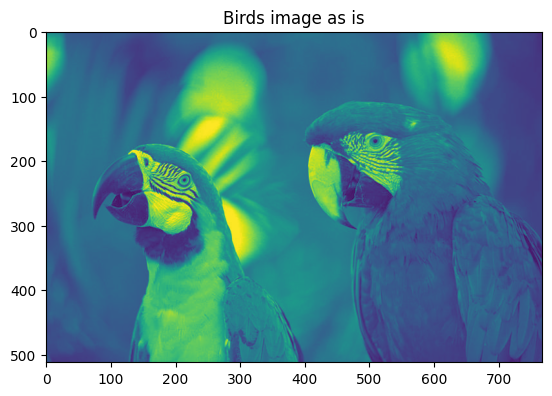

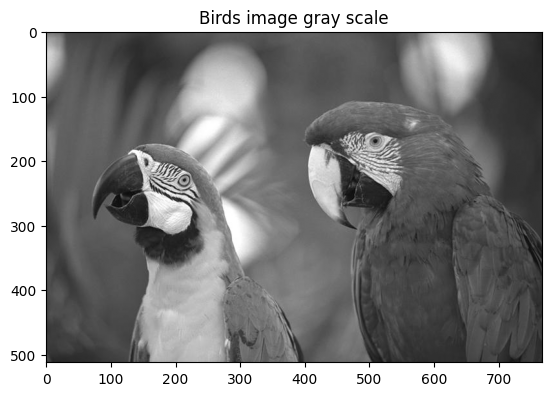

In [24]:
# plt.title("Birds image as is")
# plt.imshow(birds_img_arr)
# plt.show()
show_image("Birds image as is", birds_img_arr)

# plt.title("Birds image gray scale")
# plt.imshow(birds_img_arr, cmap="gray")
# plt.show()
show_image("Birds image gray scale", birds_img_arr, cmap="gray")

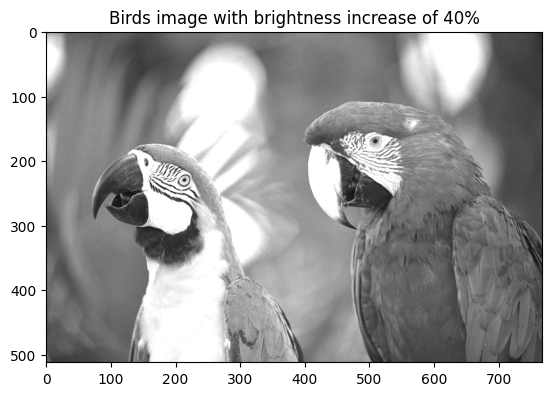

In [25]:
# Increase brightness by 40%
# Convert to float to do the math, then clip and convert back.
# This is required to handle the integer overflow problem...
brightness_increase_pct = 40
brightness_increase_factor = 1 + brightness_increase_pct / 100
birds_brighter_img_arr = np.clip(
      birds_img_arr.astype(np.float64) * brightness_increase_factor
      , 0, 255
    ).astype(np.uint8)

show_image(f"Birds image with brightness increase of {brightness_increase_pct}%", birds_brighter_img_arr, cmap="gray")

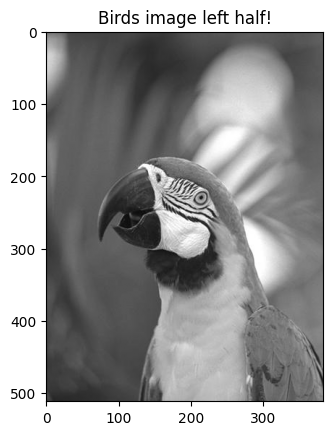

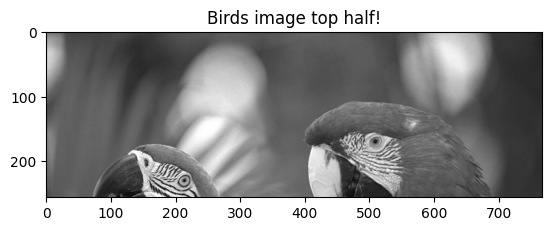

In [26]:
# Image cropping/slicing
birds_img_array_left_half = birds_img_arr[:, :birds_img_arr.shape[1]//2]
show_image("Birds image left half!", birds_img_array_left_half, cmap='gray')

birds_img_array_top_half = birds_img_arr[:birds_img_arr.shape[0]//2, :]
show_image("Birds image top half!", birds_img_array_top_half, cmap='gray')

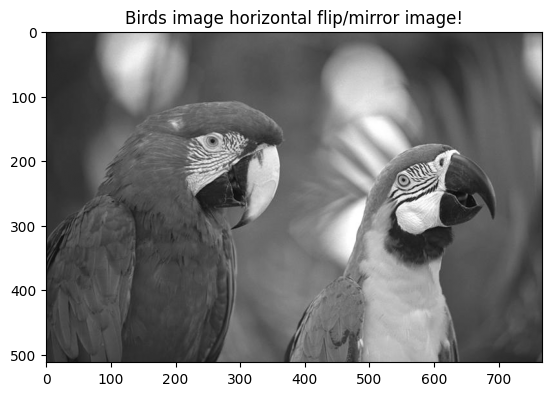

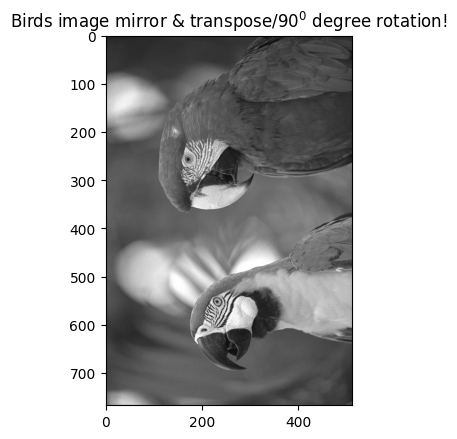

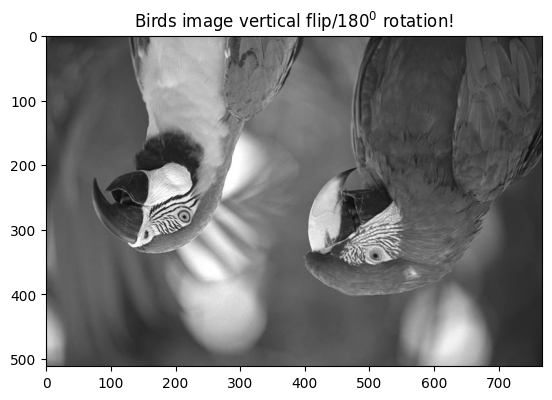

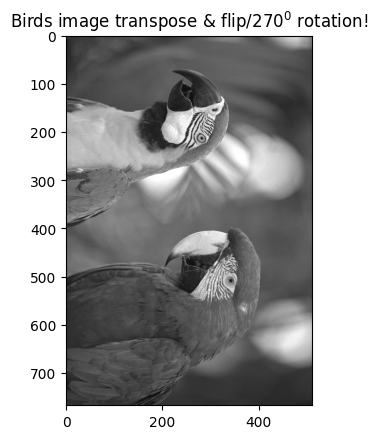

In [27]:
# Rotation, Flipping etc...

birds_img_hflip = birds_img_arr[:, ::-1]
show_image("Birds image horizontal flip/mirror image!", birds_img_hflip, cmap='gray')

birds_ninety_deg_rotated_img = birds_img_arr[:, ::-1].T
show_image(r"Birds image mirror & transpose/$90^0$ degree rotation!", birds_ninety_deg_rotated_img, cmap='gray')

birds_img_vflip = birds_img_arr[::-1]
show_image(r"Birds image vertical flip/$180^0$ rotation!", birds_img_vflip, cmap='gray')

birds_img_transpose = birds_img_arr.T
show_image("Birds image transpose & flip/$270^0$ rotation!", birds_img_transpose[:, ::-1], cmap='gray')


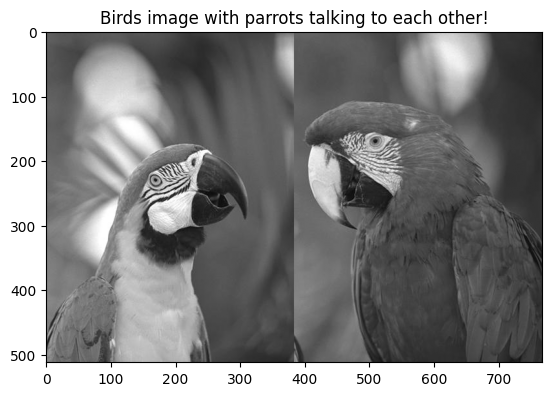

In [28]:
# Make parrots talk to each other...
birds_img_hsplits = np.hsplit(birds_img_arr, 2)

left_parrot_horizontal_flip = birds_img_hsplits[0][:, ::-1]

new_birds_img_arr = np.hstack((left_parrot_horizontal_flip, birds_img_hsplits[1]))

show_image("Birds image with parrots talking to each other!", new_birds_img_arr, cmap='gray')